In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

import json

import new_utils


In [2]:
experiment_sets = [
    [
        'd75786f7-data-2018-01-25-big-experiment',
        '18a75a2d-data-2018-03-19-big-experiment',
    ],
    [
        '6b2b35f0-rounds-10-evidence-1-bit-experiment',
    ],
    [
        '095ddcbc-rounds-10-evidence-4-big-experiment-high-prob',
    ],
    [
        'b7d0390f-rounds-10-evidence-4-population-5',
        'abf00068-rounds-10-evidence-4-population-5',
    ],
    [
        '70f80fdf-rounds-10-evidence-1-population-5',
        'd9145d2a-rounds-10-evidence-1-population-5',
    ]
]


In [3]:
names = ['Experiment-1',
         'Experiment-2',
         'Experiment-3',
         'Experiment-4',
         'Experiment-5',
         ]



sizes = [20,20,20,5,5]
n_evidences = [4,1,4,4,1]
part_probs = [0.6, 0.6, 0.8, 0.6, 0.6]



In [4]:
df = None

for exp in range(len(experiment_sets)):

    exp_name = names[exp]
    gen_size = sizes[exp]
    n_evidence = n_evidences[exp]
    part_prob = part_probs[exp]

    for in_dir in experiment_sets[exp]:

        data,fails,parts = new_utils.get_data(in_dir, n_evidence)
        new_df = new_utils.get_parsed_data(data, fails, parts, part_prob, in_dir)
        new_df['Experiment'] = exp
        new_df['Gen Size'] = gen_size
        new_df['Num Evidence'] = n_evidence
        new_df['Part Probability'] = part_prob
        if df is None:
            df = new_df
        else:
            df = pd.concat([df, new_df])


199 21
Total participants: 200


/home/appreciate/Dropbox (MIT)/spaceship/dallinger-experiment-nhb/new_utils.py:138: FutureWarning: pd.rolling_sum is deprecated for ndarrays and will be removed in a future version
  net_evidence[i] = pd.rolling_sum(evidence, i, 1)


200 8
Total participants: 200
200 16
Total participants: 200
200 24
Total participants: 200
50 0
Total participants: 50
50 5
Total participants: 50
50 3
Total participants: 50
50 3
Total participants: 50


In [5]:
asocial_p = 0.95

In [6]:

models = [
    'Nonsocial Probability Matching',
    'Nonsocial Bayesian Probability Matching',
    'Nonsocial Utility Maximizing',
    'Naive Copying',
    'Social Sampling (Probability Matching)',
    'Social Sampling (Bayesian)'
]

pos_p = df['Part Probability']
neg_p = 1 - df['Part Probability']

df['Nonsocial Probability Matching'] = df['Last Evidence']

evidence = df['Last Evidence'] * df['Num Evidence']
post = pos_p ** evidence * (1 - pos_p) ** (df['Num Evidence'] - evidence)
post /= (post + neg_p ** evidence * (1 - neg_p) ** (df['Num Evidence'] - evidence))

df['Nonsocial Bayesian Probability Matching'] = post

df['Nonsocial Utility Maximizing'] = round(post)

df['Naive Copying'] = df['last_pops']

last = df['Last Evidence']
last_pop = df['last_pops'] * (1 - asocial_p) + 0.5 * asocial_p

df['Social Sampling (Probability Matching)'] = last_pop * last / (last_pop*last + (1-last_pop)*(1 - last))

social_post_match = last_pop * pos_p ** evidence * (1 - pos_p) ** (df['Num Evidence'] - evidence)
social_post_match /= (social_post_match + (1 - last_pop) * neg_p ** evidence * (1 - neg_p) ** (df['Num Evidence'] - evidence))
df['Social Sampling (Bayesian)'] = social_post_match




In [7]:
len(df)

2304

In [8]:
df.columns

Index(['Game', 'Game Net', 'Last Evidence', 'Net', 'Popularity', 'Shift',
       'Total Evidence', 'last_perfs', 'last_pops', 'posteriors', 'probs',
       'Experiment', 'Gen Size', 'Num Evidence', 'Part Probability',
       'Nonsocial Probability Matching',
       'Nonsocial Bayesian Probability Matching',
       'Nonsocial Utility Maximizing', 'Naive Copying',
       'Social Sampling (Probability Matching)', 'Social Sampling (Bayesian)'],
      dtype='object')

In [9]:
import os
df.to_csv('data.csv')
os.system('Rscript nhb-r1-analysis.R > tmp')
with open('tmp') as f:
    print(''.join(f.readlines()))


Call:
lm(formula = Popularity ~ Total.Evidence + Last.Evidence + factor(Experiment) + 
    factor(Game.Net), data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.63296 -0.11521 -0.00616  0.11684  0.68432 

Coefficients: (4 not defined because of singularities)
                                                                          Estimate
(Intercept)                                                               0.294710
Total.Evidence                                                            0.052269
Last.Evidence                                                             0.245841
factor(Experiment)1                                                       0.032488
factor(Experiment)2                                                      -0.011698
factor(Experiment)3                                                       0.010894
factor(Experiment)4                                                       0.121556
factor(Game.Net)095ddcbc-rounds-10-evidence-4-big-exper

In [10]:
for exp in range(len(experiment_sets)):
    
    print('Condition', exp+1)
    
    sub_df = df.loc[df['Experiment'] == exp]
    
    sub_df.to_csv('data.csv')
    os.system('Rscript nhb-r1-analysis.R > tmp')
    with open('tmp') as f:
        print(''.join(f.readlines()))


Condition 1

Condition 2

Condition 3

Condition 4

Condition 5




Condition 1

Correlation: 0.429050845151
Nonsocial Probability Matching Correlation: 0.606221967864
Nonsocial Bayesian Probability Matching Correlation: 0.614061950227
Nonsocial Utility Maximizing Correlation: 0.562155869476
Naive Copying Correlation: 0.152267097711
Social Sampling (Probability Matching) Correlation: 0.609157264654
Social Sampling (Bayesian) Correlation: 0.618559624025

Nonsocial Probability Matching MSE: 25.9475
Nonsocial Bayesian Probability Matching MSE: 14.399420868
Nonsocial Utility Maximizing MSE: 105.01
Naive Copying MSE: 24.9525
Social Sampling (Probability Matching) MSE: 25.8108876346
Social Sampling (Bayesian) MSE: 14.2469022053
N 576

Condition 2

Correlation: 0.387505762959
Nonsocial Probability Matching Correlation: 0.651345355284
Nonsocial Bayesian Probability Matching Correlation: 0.651345355284
Nonsocial Utility Maximizing Correlation: 0.651345355284
Naive Copying Correlation: 0.166062159887
Social Sampling (Probability Matching) Correlation: 0.6513453

/home/appreciate/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)



Condition 4

Correlation: 0.289453512285
Nonsocial Probability Matching Correlation: 0.444379521731
Nonsocial Bayesian Probability Matching Correlation: 0.449472836333
Nonsocial Utility Maximizing Correlation: 0.444804387854
Naive Copying Correlation: 0.132710747581
Social Sampling (Probability Matching) Correlation: 0.447025049699
Social Sampling (Bayesian) Correlation: 0.453283400224

Nonsocial Probability Matching MSE: 43.03
Nonsocial Bayesian Probability Matching MSE: 33.2639211922
Nonsocial Utility Maximizing MSE: 111.88
Naive Copying MSE: 62.12
Social Sampling (Probability Matching) MSE: 42.8878063806
Social Sampling (Bayesian) MSE: 33.0871659139
N 576

Condition 5

Correlation: 0.163739988624
Nonsocial Probability Matching Correlation: 0.371492753016
Nonsocial Bayesian Probability Matching Correlation: 0.371492753016
Nonsocial Utility Maximizing Correlation: 0.371492753016
Naive Copying Correlation: 0.108997973508
Social Sampling (Probability Matching) Correlation: 0.3714927530

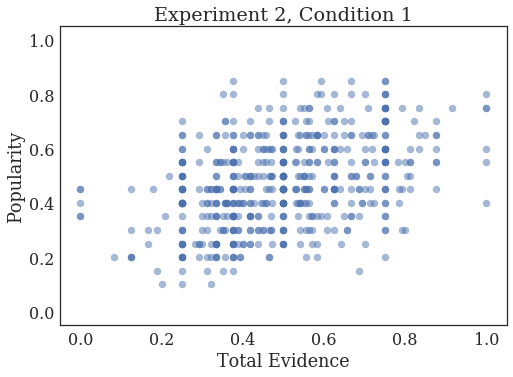

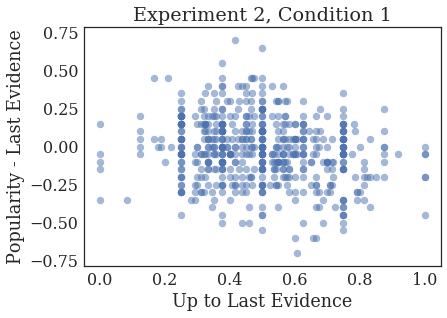

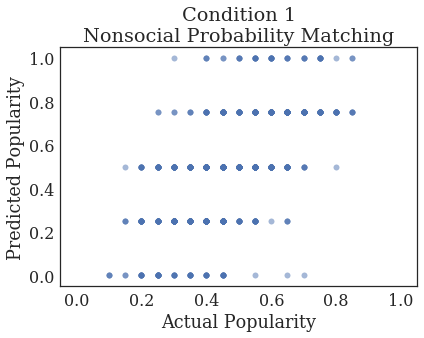

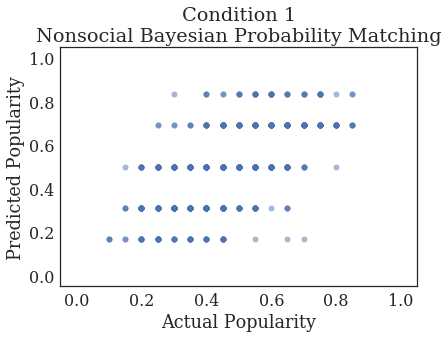

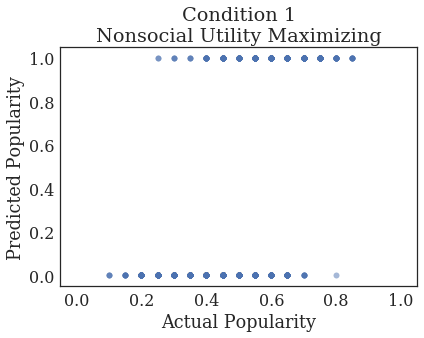

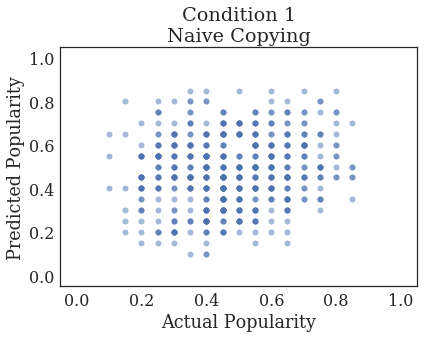

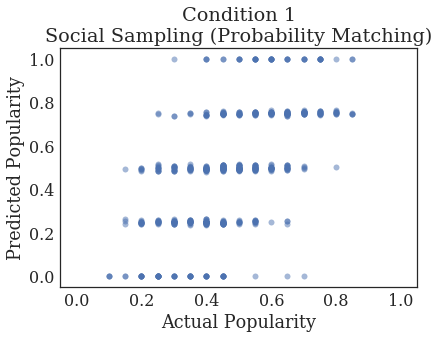

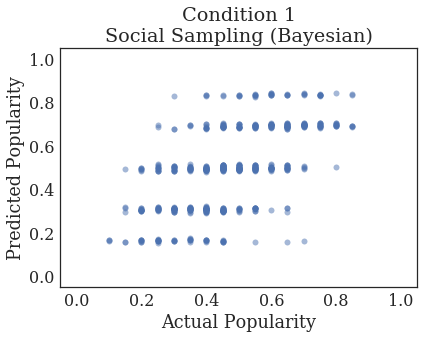

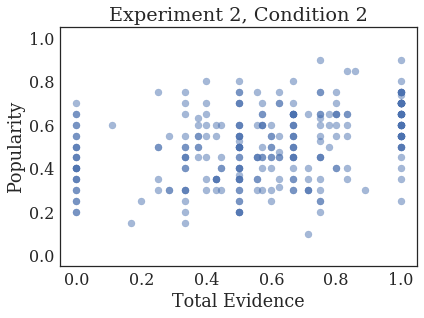

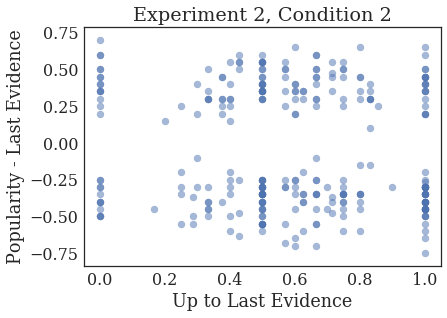

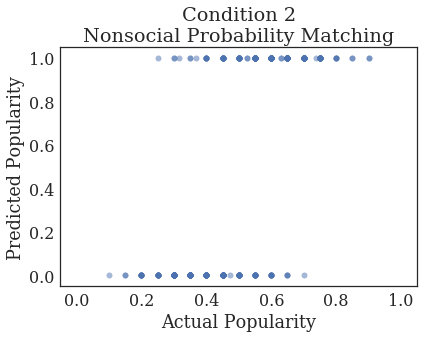

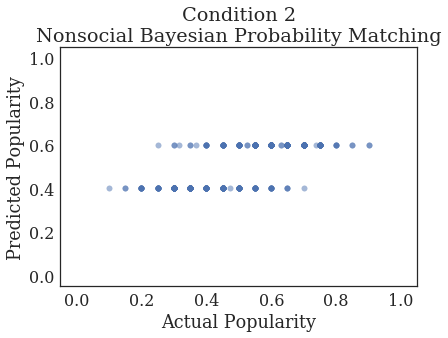

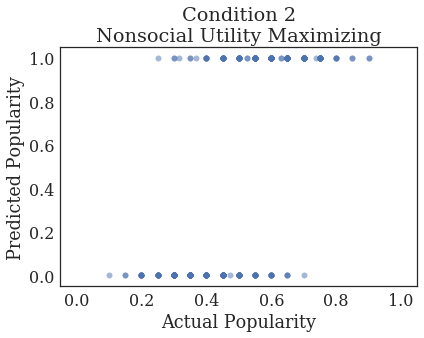

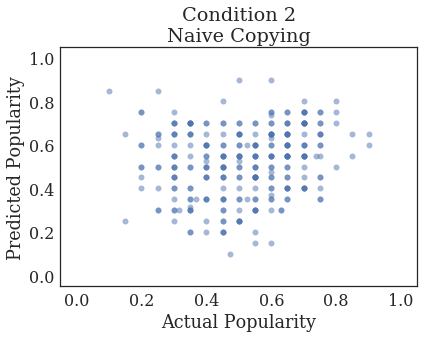

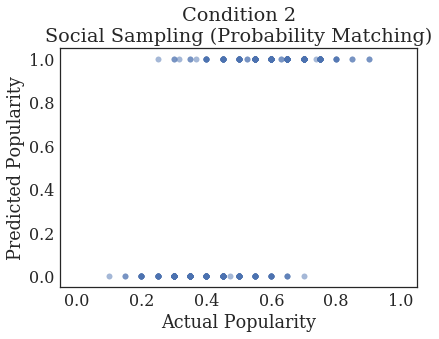

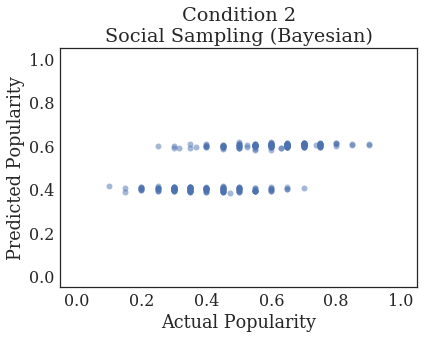

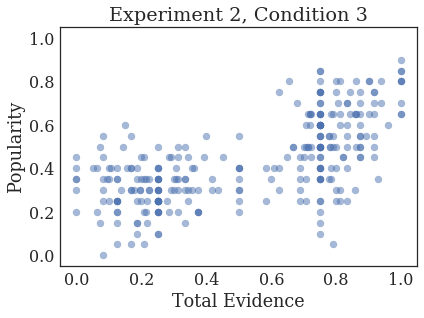

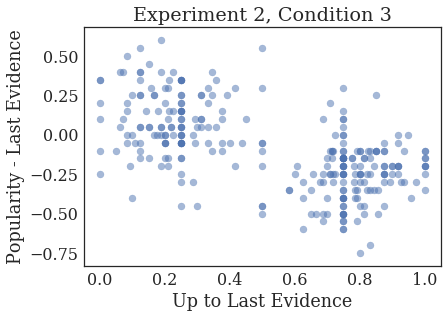

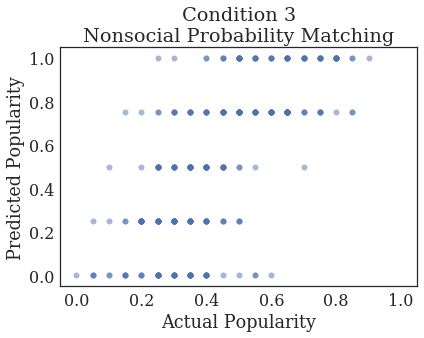

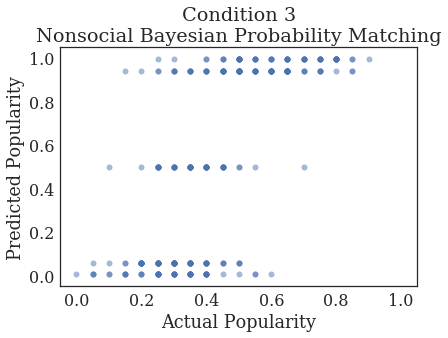

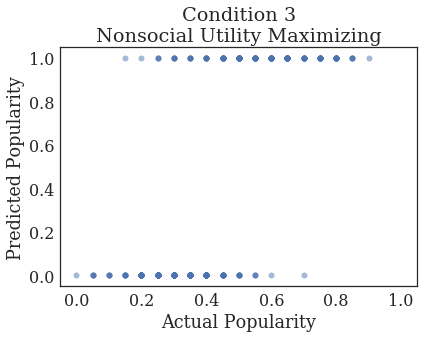

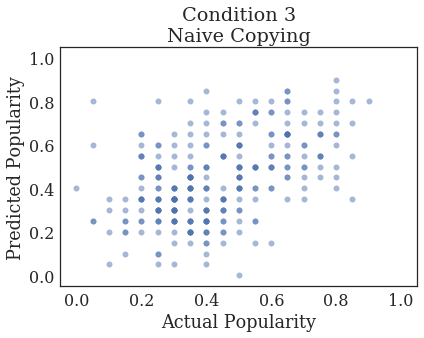

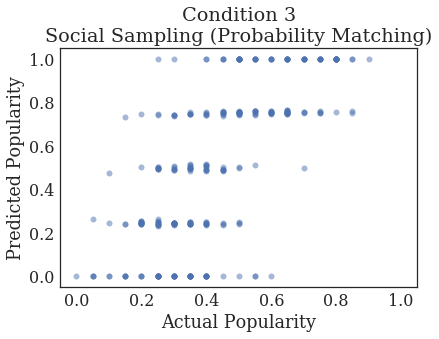

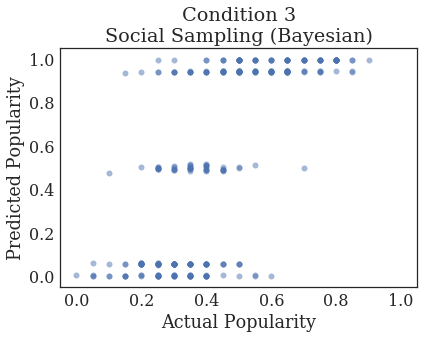

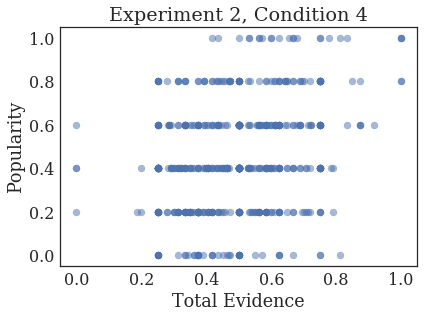

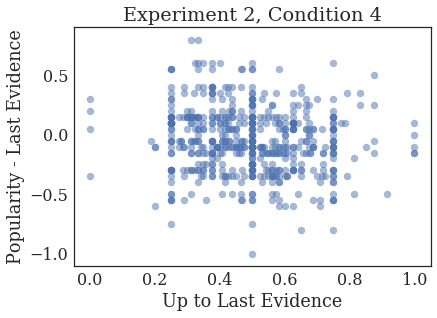

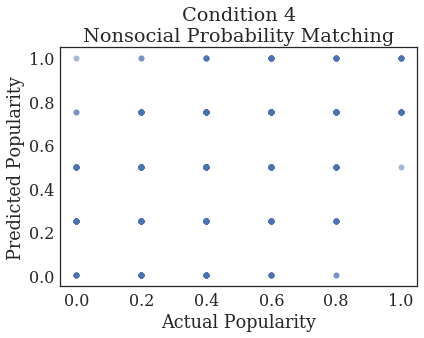

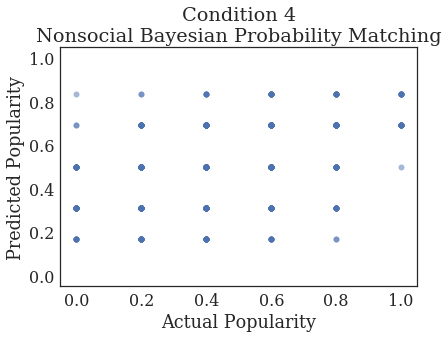

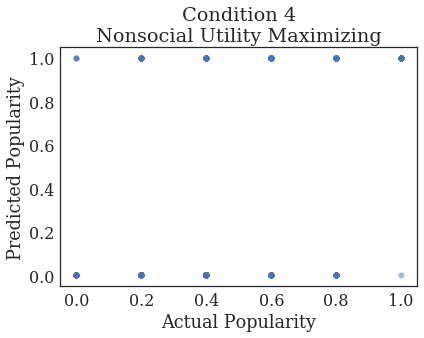

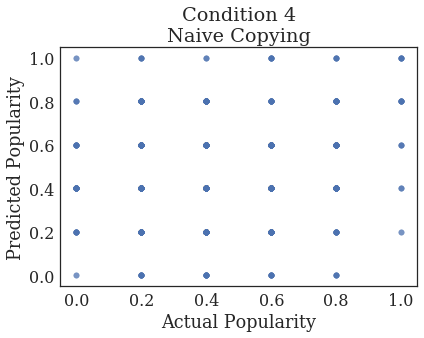

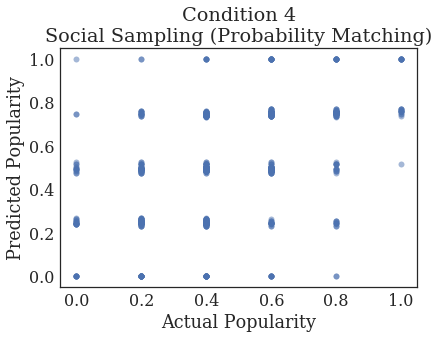

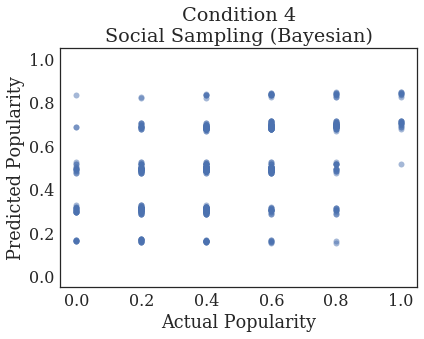

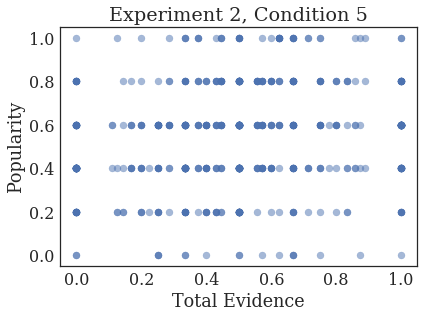

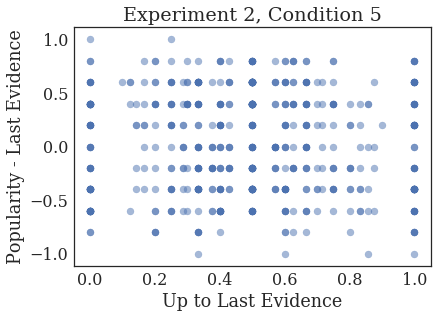

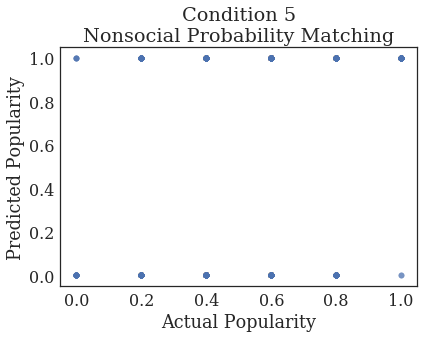

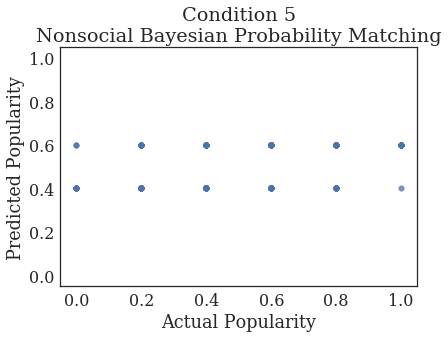

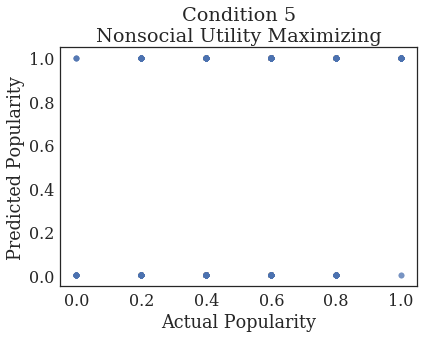

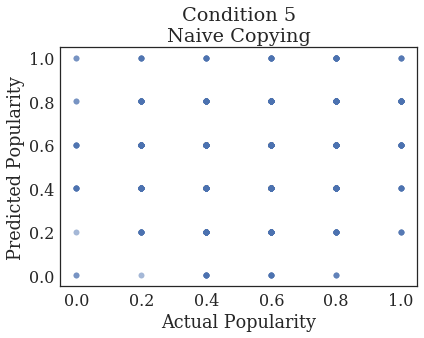

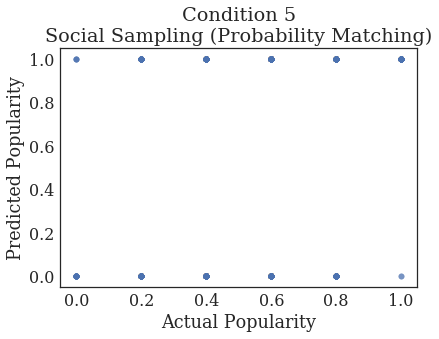

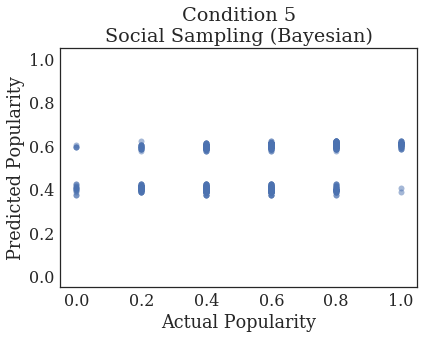

In [11]:
for exp in range(len(experiment_sets)):
    
    sub_df = df.loc[df['Experiment'] == exp]

    plt.figure()
    sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white')
    plt.scatter(sub_df['Total Evidence'],sub_df['Popularity'], s = 50, alpha = 0.5)
    plt.xlim(-0.05,1.05)
    plt.ylim(-0.05,1.05)
    plt.xlabel('Total Evidence')
    plt.ylabel('Popularity')
    plt.title('Experiment 2, Condition ' + str(exp+1))
    plt.savefig('./plots/exp-2-' + str(exp) + '-evi-pop.pdf', bbox_inches='tight')

    plt.figure()
    sns.set(context = 'paper', font_scale = 2, font='serif', style = 'white')
    plt.scatter(sub_df['last_perfs'],sub_df['Popularity'] - sub_df['Last Evidence'], s = 50, alpha = 0.5)
    plt.xlim(-0.05,1.05)
    plt.xlabel('Up to Last Evidence')
    plt.ylabel('Popularity - Last Evidence')
    plt.title('Experiment 2, Condition ' + str(exp+1))
    plt.savefig('./plots/exp-2-' + str(exp) + '-evi-pop-diff.pdf', bbox_inches='tight')
    
    print()
    print('Condition', exp+1)
    print()
    print('Correlation:', np.corrcoef(sub_df['Total Evidence'],sub_df['Popularity'])[0,1])
    for m in models:
        print(m, 'Correlation:', np.corrcoef(sub_df[m], sub_df['Popularity'])[0,1])
    print()
    for m in models:
        print(m, 'MSE:', sum((sub_df[m] - sub_df['Popularity'])**2))
    print('N',len(sub_df))
    
    for m in models:
        plt.figure()
        plt.scatter(sub_df['Popularity'], sub_df[m], alpha = 0.5)
        plt.xlim(-0.05,1.05)
        plt.ylim(-0.05,1.05)
        plt.ylabel('Predicted Popularity')
        plt.xlabel('Actual Popularity')
        plt.title('Condition ' + str(exp+1) + '\n' + m)
        plt.savefig('./plots/exp-2-' + str(exp) + '-' + '-'.join(m.split(' ')) + '.pdf', bbox_inches='tight')